<a href="https://colab.research.google.com/github/Petas14/Data-Science/blob/main/Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

from collections import Counter

In [ ]:
data = load_iris()
X = data['data']
y = data['target']

# A ideia principal da árvore de decisão é dividir o dataset com o uso de hiperplanos perpendiculares aos features, de forma a miniminizar a métrica escolhida;

# Chamamos de árvore porque usa uma estrutura de árvore binária, na qual os dados são divididos de acordo com cada regra em cada nó;

# $\textbf{AS ÁRVORES SÃO ÓTIMAS PARA INTERPOLAR, EXTRAPOLAÇÃO AINDA É UM DESAFIO !!!}$

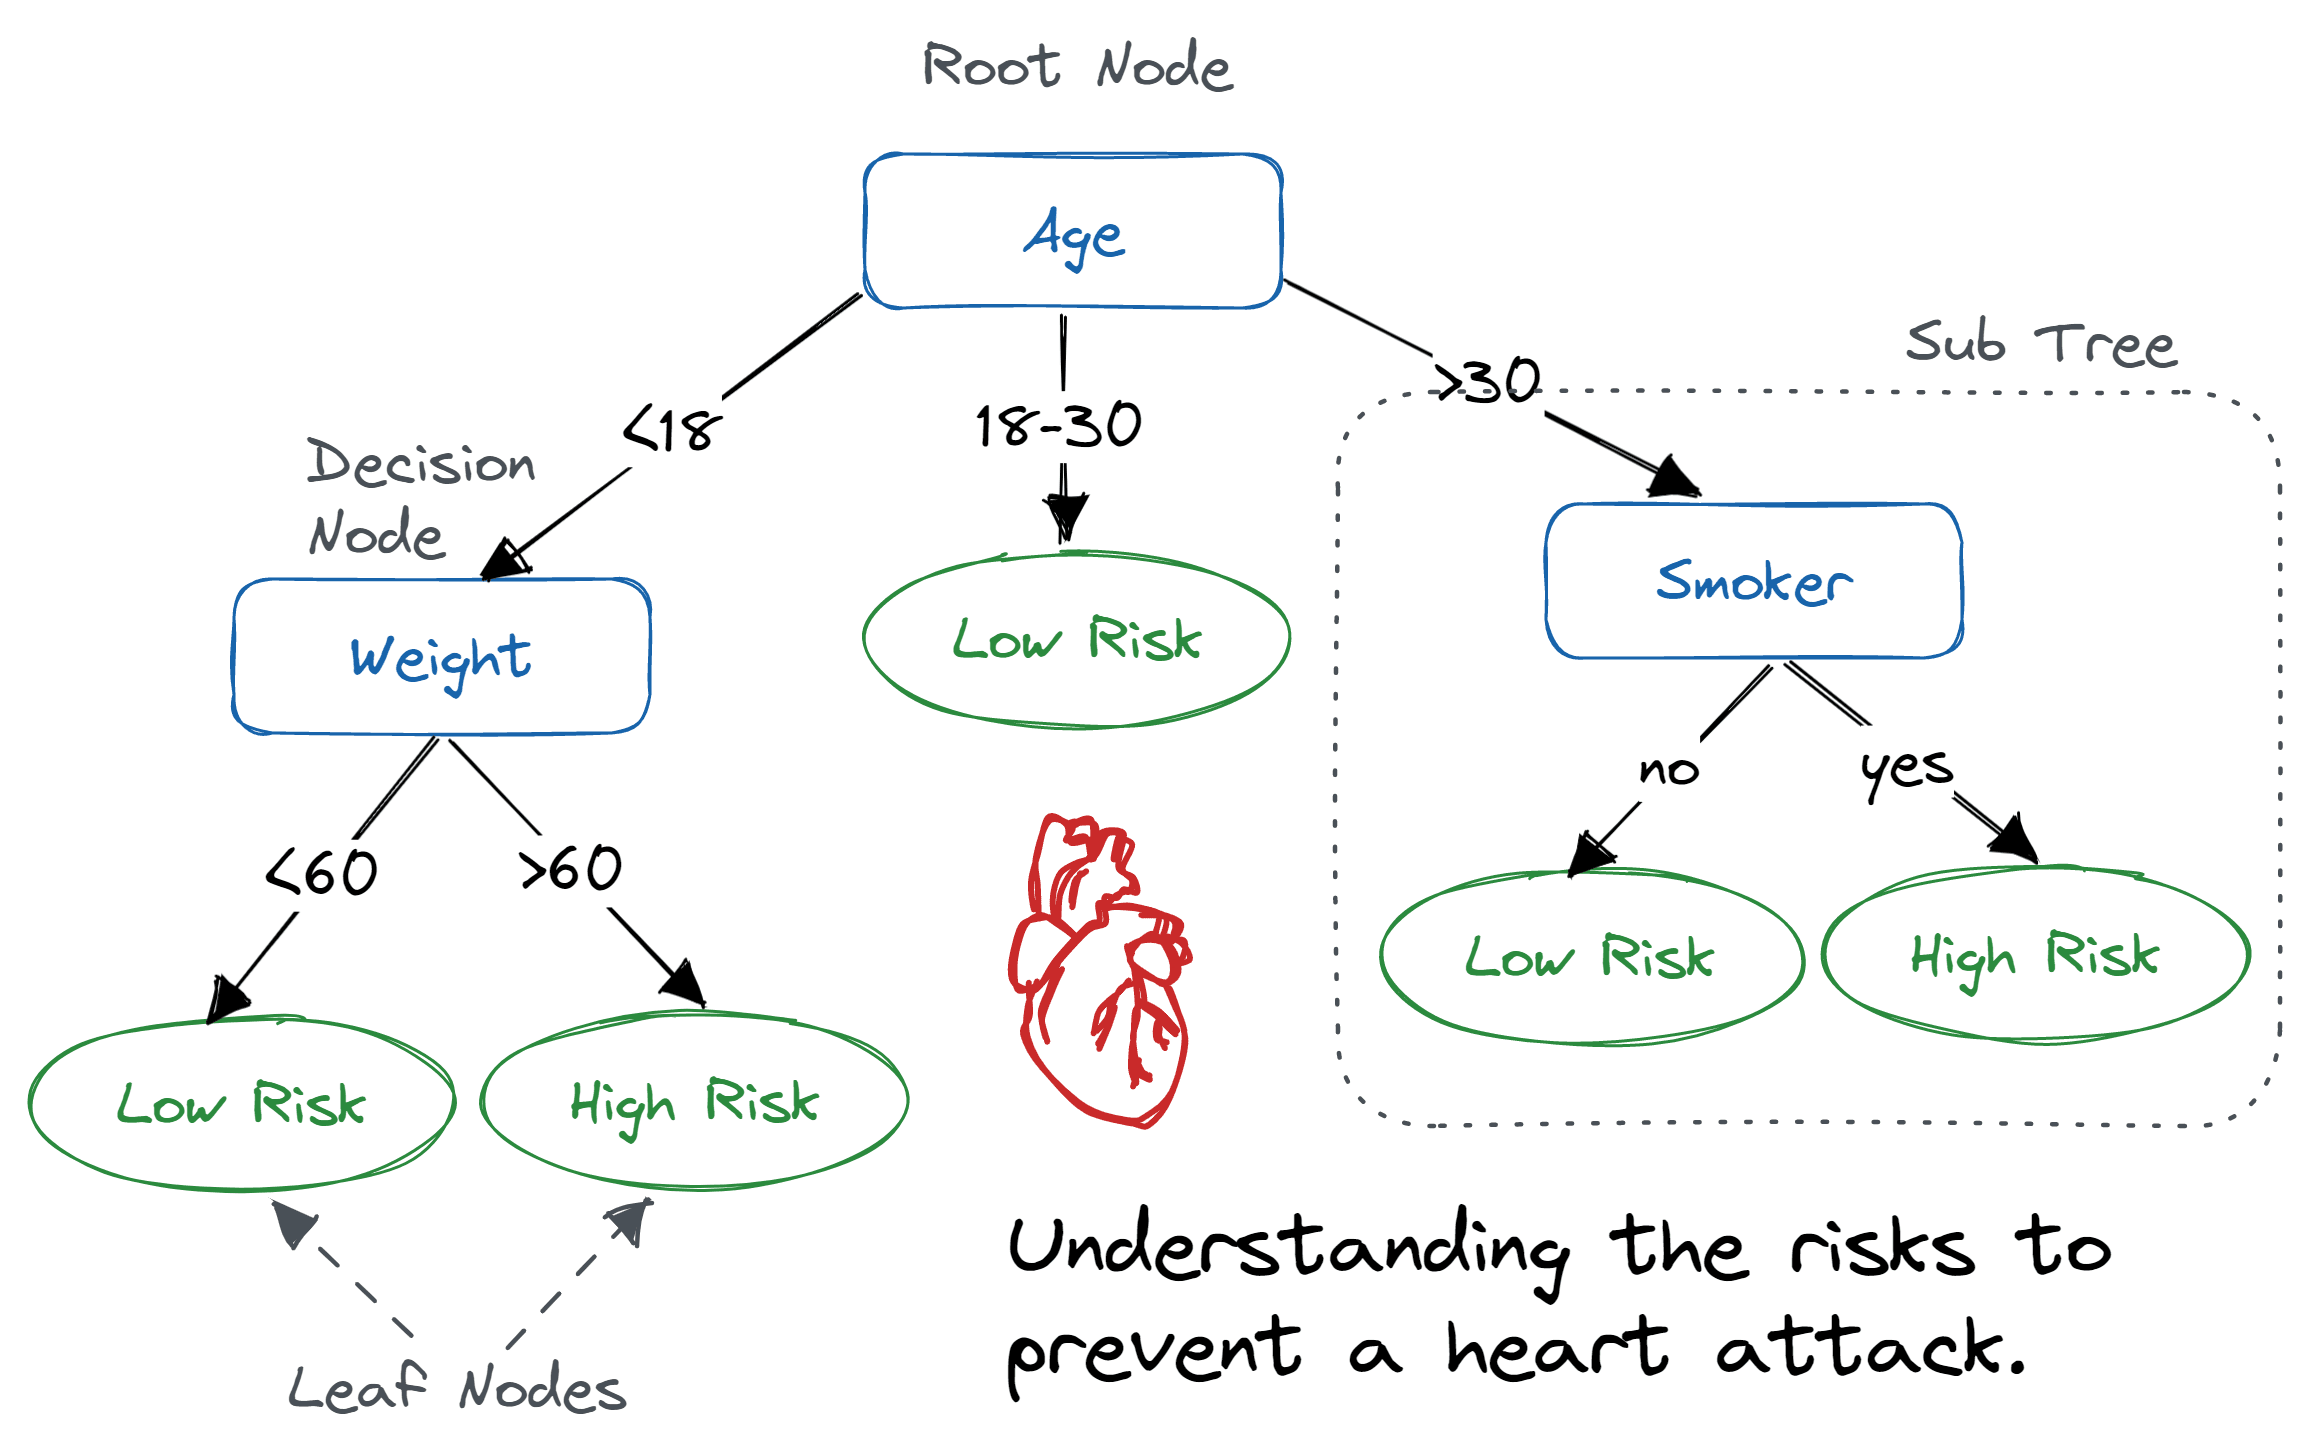

###FONTE: https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.datacamp.com%2Ftutorial%2Fdecision-tree-classification-python&psig=AOvVaw0ZaVeLfwdXOUBT37-GxFrO&ust=1697418233317000&source=images&cd=vfe&opi=89978449&ved=0CBEQjRxqFwoTCPiYl-jt9oEDFQAAAAAdAAAAABAE

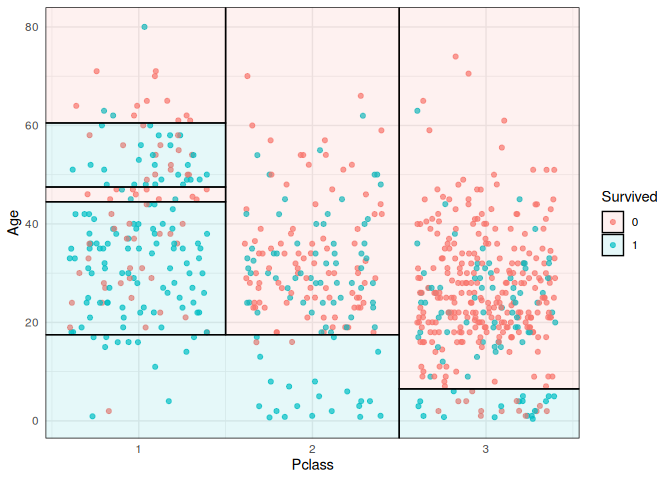

### Fonte: https://www.google.com/url?sa=i&url=https%3A%2F%2Fpaulvanderlaken.com%2F2020%2F03%2F31%2Fvisualizing-decision-tree-partition-and-decision-boundaries%2F&psig=AOvVaw3CF6PV3boz1QMnIGEXW4md&ust=1697418388267000&source=images&cd=vfe&opi=89978449&ved=0CBEQjRxqFwoTCICCnrLu9oEDFQAAAAAdAAAAABAE

# É possível perceber a partir das figuras acima que ele apenas traça retas paralelas ao eixo, e essas retas simplesmente continuam, o que faz com que seu potencial de extrapolação cai bastante.

In [1]:
class Node:
  def __init__(self,feature = None,threshold = None,left = None,right = None,*,value = None):
    self.feature = feature
    self.threshold = threshold
    self.left = left
    self.right = right
    self.value = value

  def is_leaf_node(self):
    return self.value is not None

class DT:
  def __init__(self,min_samples_split = 2,max_depth = 100,n_features = None):
    self.min_samples_split = min_samples_split
    self.max_depth = max_depth
    self.n_features = n_features
    self.root=None

  def fit(self,X,y):
    self.n_features = X.shape[1] if not self.n_features else min(X.shape[1],self.n_features)
    self.root = self._grow_tree(X,y)


  def _grow_tree(self,X,y,depth = 0):
    n_samples, n_feats = X.shape
    n_labels = len(np.unique(y))
    # Avaliar condição de parada
    if (depth >= self.max_depth or n_labels == 1 or n_samples < self.min_samples_split):
      leaf_value = self._most_common_label(y)
      return Node(value = leaf_value)

    feat_idx = np.random.choice(n_feats,self.n_features,replace = False)
    # achar melhor separados
    best_thresh,best_feature = self._best_split(X,y,feat_idx)

    # gerar uma folha filho
    left_idxs, right_idxs = self._split(X[:,best_feature],best_thresh)
    left = self._grow_tree(X[left_idxs,:],y[left_idxs],depth+1)
    right = self._grow_tree(X[right_idxs,:],y[right_idxs],depth+1)
    return Node(best_feature,best_thresh,left,right)


  def _best_split(self,X,y,feat_idxs):
    best_gain = -1
    split_idx, split_threshold = None,None

    for feat_idx in feat_idxs:
      X_column = X[:,feat_idx]
      thresholds = np.unique(X_column)

      for thr in thresholds:
        gain = self._information_gain(y,X_column,thr)

        if gain > best_gain:
          best_gain = gain
          split_idx = feat_idx
          split_threshold = thr
    return split_threshold, split_idx

  def _information_gain(self,y,X_column,threshold):
    parent_entropy = self._entropy(y)

    left_idxs, right_idxs = self._split(X_column,threshold)

    if len(left_idxs) == 0 or len(right_idxs) == 0:
      return 0

    n = len(y)
    n_l,n_r = len(left_idxs), len(right_idxs)
    e_l,e_r = self._entropy(y[left_idxs]),self._entropy(y[right_idxs])
    child_entropy = (n_l/n)*e_l + (n_r/n)*e_r
    return parent_entropy - child_entropy


  def _split(self,X_column,split_thresh):
    left_idxs = np.argwhere(X_column<=split_thresh).flatten()
    right_idxs = np.argwhere(X_column>split_thresh).flatten()
    return left_idxs, right_idxs


  def _entropy(self,y):
    hist = np.bincount(y)
    ps = hist/len(y)
    return -np.sum([p*np.log(p) for p in ps if p > 0])

  def _most_common_label(self,y):
    counter= Counter(y)
    value =  counter.most_common(1)[0][0]
    return value

  def _traverse_tree(self,X,node):
    if node.is_leaf_node():
      return node.value

    if X[node.feature] <= node.threshold:
      return self._traverse_tree(X,node.left)
    return self._traverse_tree(X,node.right)

  def predict(self,X):
    return np.array([self._traverse_tree(x,self.root) for x in X])

In [ ]:
reg = DT()
reg.fit(X,y)
yhat = reg.predict(X)

In [ ]:
print(yhat.flatten())
print(y.flatten())

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
